### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as web
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

plt.style.use('fivethirtyeight')

Importing plotly failed. Interactive plots will not work.


### Hypothesis & Goals of the Notebook

- Comparison with other car maker & US tech companies to measure potential trend correlation of general stock exchange activity

- We assume that the general environment of the stock exchange is favorable to Tesla overall

- Tesla should outperform its car competitors and be considered rather a Tech company = stronger correlation with Tech than with car companies

## Importing Tesla daily stock exchange values from 2010 IPO onwards

In [3]:
df_TSLA = pd.read_csv('../DataSets/Stocks_raw_data/TSLA_stocks_rate_2010-01-01_to_2020-03-08.csv', index_col='Date')

In [4]:
df_TSLA['PCT_change'] = df_TSLA['Adj Close'].pct_change(fill_method='ffill')

In [5]:
df_TSLA

,High,Low,Open,Close,Volume,Adj Close,avg_price,PCT_change
Date,,,,,,,,
2010-06-29,25.000000,17.540001,19.000000,23.889999,18766300.0,23.889999,21.270000,NaN
2010-06-30,30.420000,23.299999,25.790001,23.830000,17187100.0,23.830000,26.860000,-0.002511
2010-07-01,25.920000,20.270000,25.000000,21.959999,8218800.0,21.959999,23.095000,-0.078473
2010-07-02,23.100000,18.709999,23.000000,19.200001,5139800.0,19.200001,20.905000,-0.125683
2010-07-06,20.000000,15.830000,20.000000,16.110001,6866900.0,16.110001,17.915000,-0.160938
2010-07-07,16.629999,14.980000,16.400000,15.800000,6921700.0,15.800000,15.804999,-0.019243
2010-07-08,17.520000,15.570000,16.139999,17.459999,7711400.0,17.459999,16.545000,0.105063
2010-07-09,17.900000,16.549999,17.580000,17.400000,4050600.0,17.400000,17.224999,-0.003436
2010-07-12,18.070000,17.000000,17.950001,17.049999,2202500.0,17.049999,17.535000,-0.020115


Adding PCT_change i.e. percetange change evolution from one day to another to measure the general trend of each day

In [6]:
df_TSLA

,High,Low,Open,Close,Volume,Adj Close,avg_price,PCT_change
Date,,,,,,,,
2010-06-29,25.000000,17.540001,19.000000,23.889999,18766300.0,23.889999,21.270000,NaN
2010-06-30,30.420000,23.299999,25.790001,23.830000,17187100.0,23.830000,26.860000,-0.002511
2010-07-01,25.920000,20.270000,25.000000,21.959999,8218800.0,21.959999,23.095000,-0.078473
2010-07-02,23.100000,18.709999,23.000000,19.200001,5139800.0,19.200001,20.905000,-0.125683
2010-07-06,20.000000,15.830000,20.000000,16.110001,6866900.0,16.110001,17.915000,-0.160938
2010-07-07,16.629999,14.980000,16.400000,15.800000,6921700.0,15.800000,15.804999,-0.019243
2010-07-08,17.520000,15.570000,16.139999,17.459999,7711400.0,17.459999,16.545000,0.105063
2010-07-09,17.900000,16.549999,17.580000,17.400000,4050600.0,17.400000,17.224999,-0.003436
2010-07-12,18.070000,17.000000,17.950001,17.049999,2202500.0,17.049999,17.535000,-0.020115


In [7]:
df_TSLA.dtypes

High          float64
Low           float64
Open          float64
Close         float64
Volume        float64
Adj Close     float64
avg_price     float64
PCT_change    float64
dtype: object

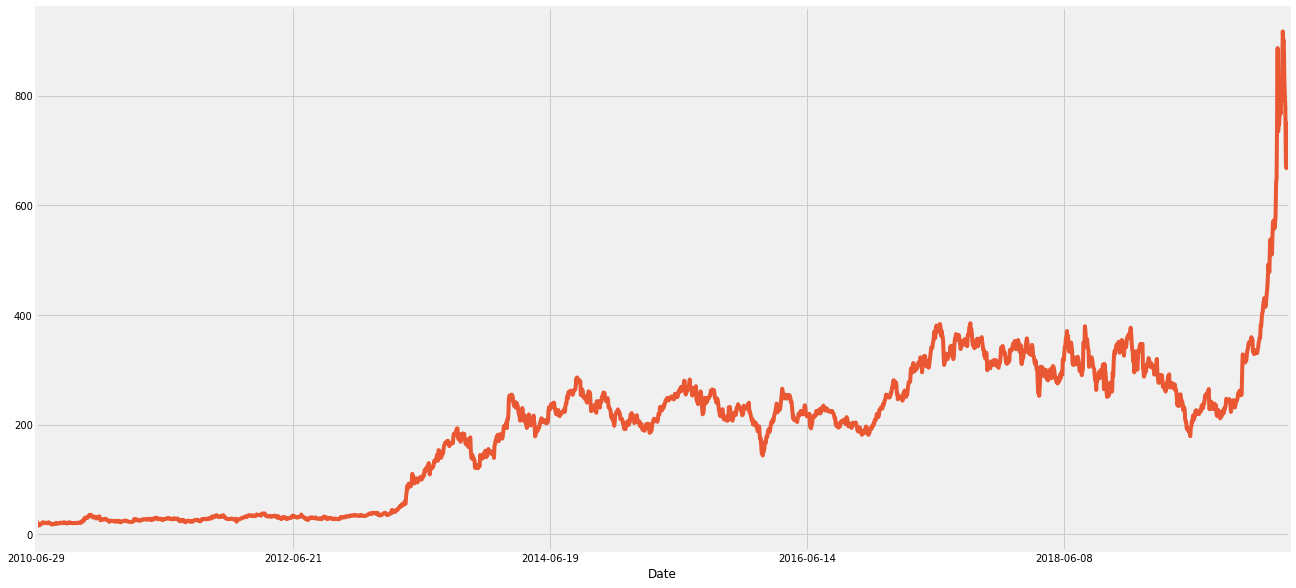

In [8]:
df_TSLA['Adj Close'].plot(figsize=(20,10), c=np.random.rand(3))

## 1 - Comparison of Car sales VS. Stock Price

### 1-1. Importing & ploting comparison of Tesla VS. Car Stock Values stocks

This section will compare various value of the previously imported value to measure how Tesla stocks evovle in comparison to other value

In [9]:
df_Car_merged = pd.read_csv('../DataSets/Stocks_raw_data/df_car_companies_merged.csv')

In [10]:
df_Car_merged.tail(50)

,Date,Tesla_ADJ_Close,GM_ADJ_Close,Ford_ADJ_Close,Toyota_ADJ_Close,Nissan_ADJ_Close,VW_ADJ_Close
2511,2019-12-24,425.250000,36.139141,141.339996,141.339996,11.87,194.899994
2512,2019-12-26,430.940002,36.040344,141.529999,141.529999,11.59,193.699997
2513,2019-12-27,430.380005,36.119381,141.279999,141.279999,11.59,195.000000
2514,2019-12-30,414.700012,36.000824,140.610001,140.610001,11.54,192.000000
2515,2019-12-31,418.329987,36.158894,140.539993,140.539993,11.57,192.559998
2516,2020-01-02,430.260010,36.929497,142.240005,142.240005,11.64,199.750000
2517,2020-01-03,443.010010,35.882271,140.750000,140.750000,11.56,195.449997
2518,2020-01-06,451.540009,35.408058,140.770004,140.770004,11.56,195.000000
2519,2020-01-07,469.059998,34.726376,141.509995,141.509995,11.66,195.529999
2520,2020-01-08,492.140015,34.232399,141.160004,141.160004,11.68,194.649994


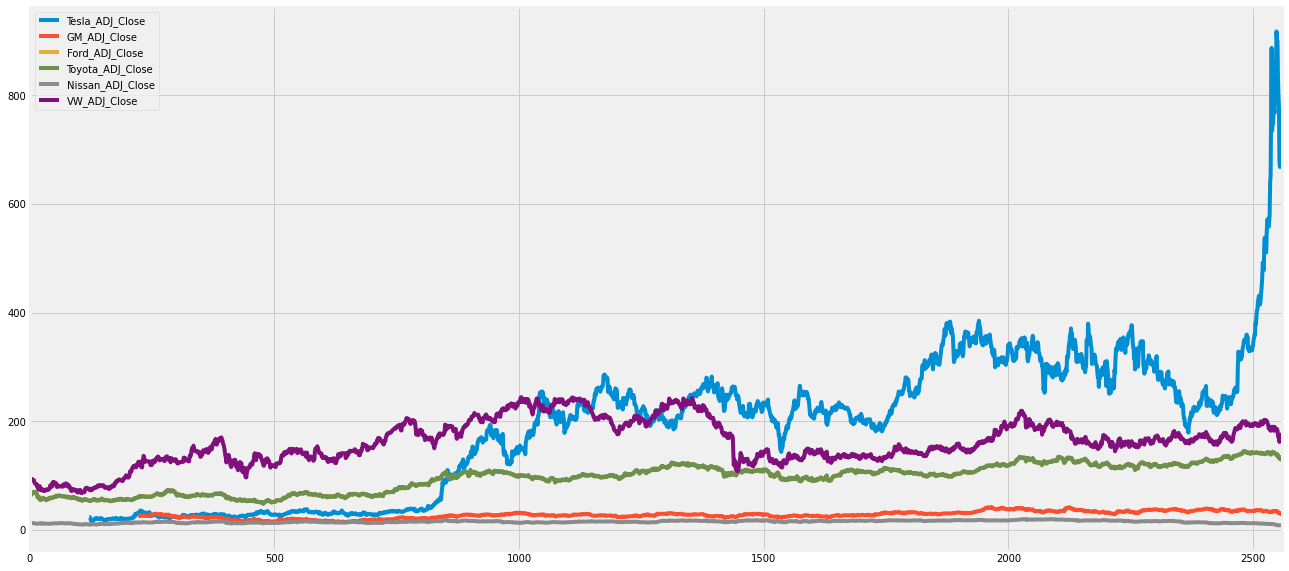

In [12]:
df_Car_merged.plot(figsize=(20,10))

Tesla has a stock evolution way higher than its competition, which makes its stock reading hard

In [22]:
df_Car_merged.describe()

,Tesla_ADJ_Close,GM_ADJ_Close,Ford_ADJ_Close,Toyota_ADJ_Close,Nissan_ADJ_Close,VW_ADJ_Close
count,2439.000000,2339.000000,2561.000000,2561.000000,2561.000000,2560.000000
mean,192.041558,27.955376,95.908770,95.908770,15.155032,161.620755
std,132.077043,6.289506,25.584591,25.584591,2.160160,40.862304
min,15.800000,14.382098,48.211178,48.211178,8.000000,67.772964
25%,34.455000,24.269513,66.401031,66.401031,13.704939,134.662987
50%,214.360001,27.650375,101.306938,101.306938,15.332861,159.017380
75%,269.215012,32.490494,116.349686,116.349686,16.947546,192.402550
max,917.419983,41.953167,145.059998,145.059998,19.942619,244.194794


### 1-2. Correlation Matrix of all Car competitors

In [19]:
corr_car_competitors = df_Car_merged.corr()

Text(0.5, 1.0, 'correlation Matrix Car competitors')

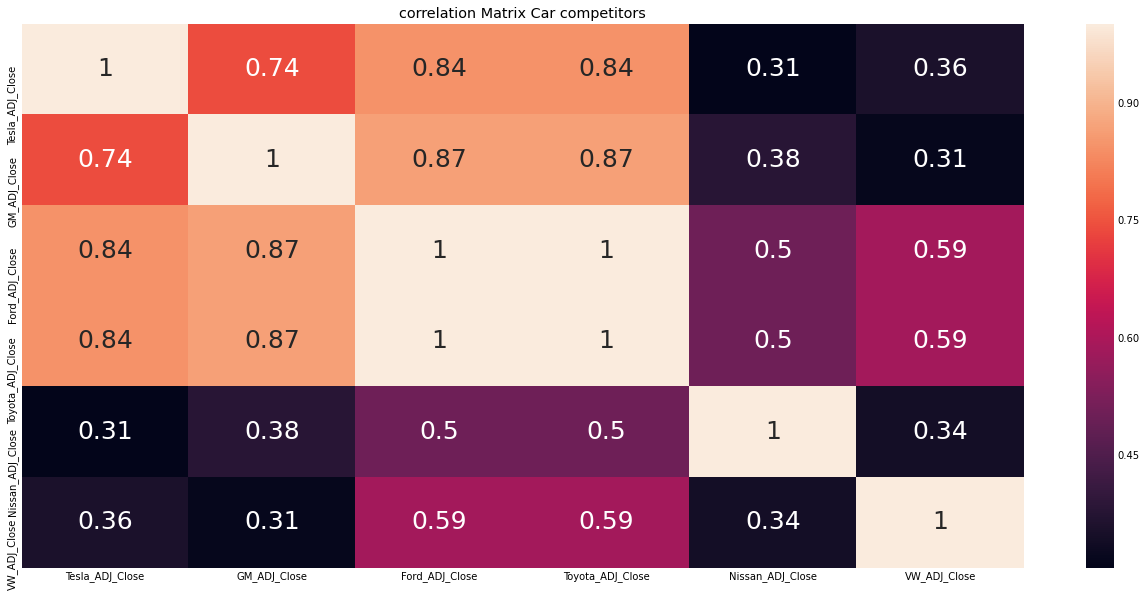

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_car_competitors, annot=True, annot_kws={"size": 25})
plt.title('correlation Matrix Car competitors')
# plt.savefig('../DataSets/Tesla_car_sales/car_correlation.png' , dpi=fig.dpi)


### 1-2. Correlation Matrix of all Car competitors

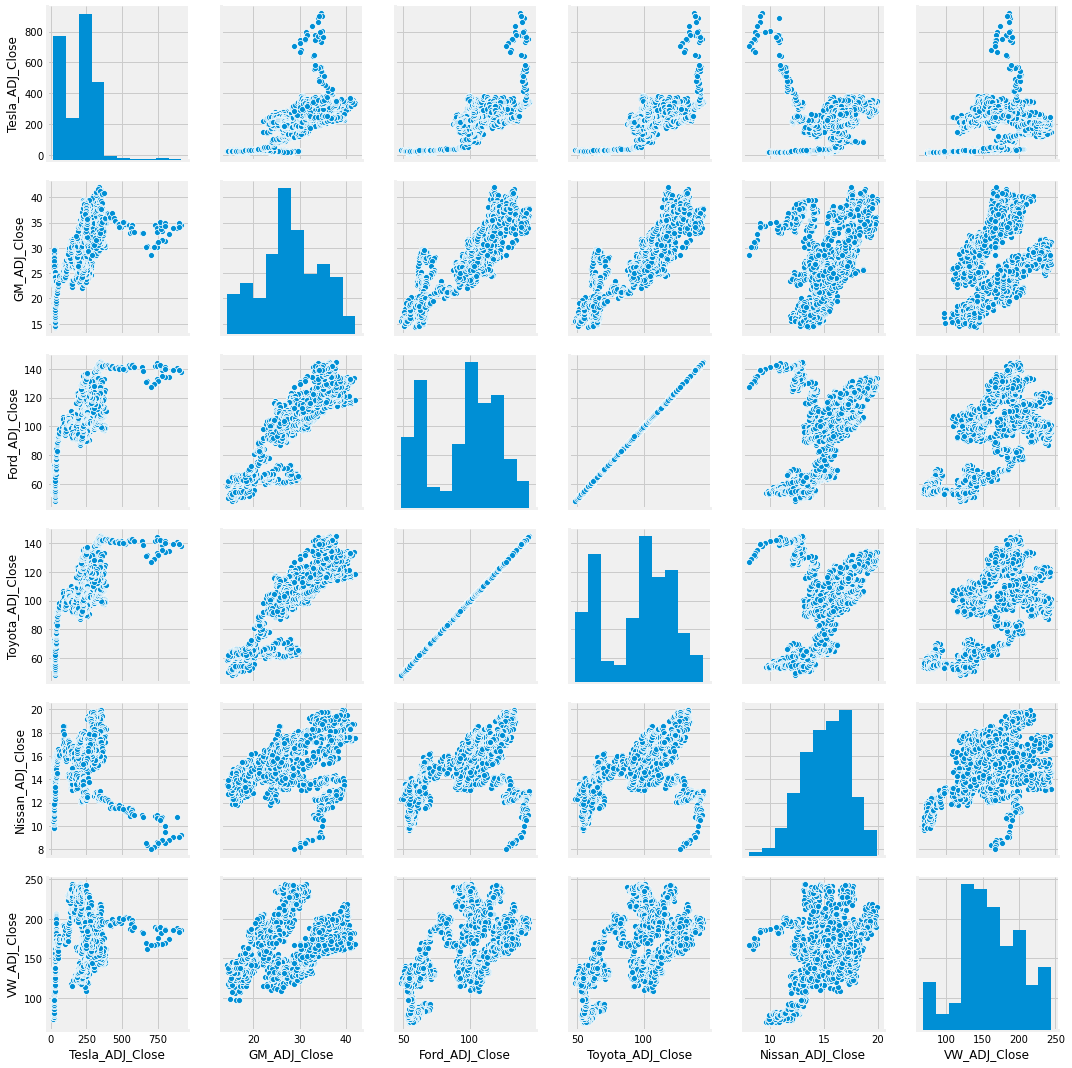

In [29]:
sns.pairplot(df_Car_merged)

###  1 - Conclusion

Tesla stocks are strongly correlated to stocks from other US based car maker, namely GM Corp & Ford with whom it shares between 75 & 85% of correlation

- it indicates a global growing trend for US car makers over the past decade

## 2 - Comparison of Tesla shares with other US GAFAM & Tech company stocks

### 2-1.Importing & ploting comparison of Tesla VS. US Tech stocks 

In [13]:
df_Tech_merged = pd.read_csv('../DataSets/Stocks_raw_data/df_Tech_merged.csv', index_col='Date')

In [14]:
df_Tech_merged

,Tesla_ADJ_Close,Google_ADJ_Close,Apple_ADJ_Close,FB_ADJ_Close,Amazon_ADJ_Close,Microsoft_ADJ_Close,Netflix_ADJ_Close,UBER_ADJ_Close
Date,,,,,,,,
2010-01-04,NaN,312.204773,26.538483,NaN,133.899994,24.294369,7.640000,NaN
2010-01-05,NaN,310.829926,26.584366,NaN,134.690002,24.302216,7.358572,NaN
2010-01-06,NaN,302.994293,26.161509,NaN,132.250000,24.153070,7.617143,NaN
2010-01-07,NaN,295.940735,26.113146,NaN,130.000000,23.901886,7.485714,NaN
2010-01-08,NaN,299.885956,26.286753,NaN,133.520004,24.066734,7.614286,NaN
2010-01-11,NaN,299.432648,26.054865,NaN,130.309998,23.760603,7.604286,NaN
2010-01-12,NaN,294.137512,25.758488,NaN,127.349998,23.603607,7.481429,NaN
2010-01-13,NaN,292.448822,26.121826,NaN,129.110001,23.823395,7.708571,NaN
2010-01-14,NaN,293.823669,25.970547,NaN,127.349998,24.302216,7.284286,NaN


In [15]:
df_Google = pd.read_csv('../DataSets/Stocks_raw_data/GOOG_stocks_rate_2010-01-01_to_2020-03-08.csv')

df_fb = pd.read_csv('../DataSets/Stocks_raw_data/FB_stocks_rate_2010-01-01_to_2020-03-08.csv')

df_Microsoft = pd.read_csv('../DataSets/Stocks_raw_data/MSFT_stocks_rate_2010-01-01_to_2020-03-08.csv')

df_Amazon = pd.read_csv('../DataSets/Stocks_raw_data/AMZN_stocks_rate_2010-01-01_to_2020-03-08.csv')

df_Apple = pd.read_csv('../DataSets/Stocks_raw_data/AAPL_stocks_rate_2010-01-01_to_2020-03-08.csv')

df_Uber = pd.read_csv('../DataSets/Stocks_raw_data/UBER_stocks_rate_2010-01-01_to_2020-03-08.csv')

df_Nasdaq = pd.read_csv('../DataSets/Stocks_raw_data/^IXIC_stocks_rate_2010-01-01_to_2020-03-08.csv')

df_Netflix = pd.read_csv('../DataSets/Stocks_raw_data/NFLX_stocks_rate_2010-01-01_to_2020-03-08.csv')

Tesla is outperformed in terms of stock value by the GAFAM i.e giants of the Tech & #1 values in the global stock exchange overall
- so-called GAFAM challenge each other on who reach the top positions - they keep setting new records in terms of stock value since 2015 onwards

- As for other tech companies, Tesla, a NASDAQ quoted company, benefits from the general positive investments towards the US tech

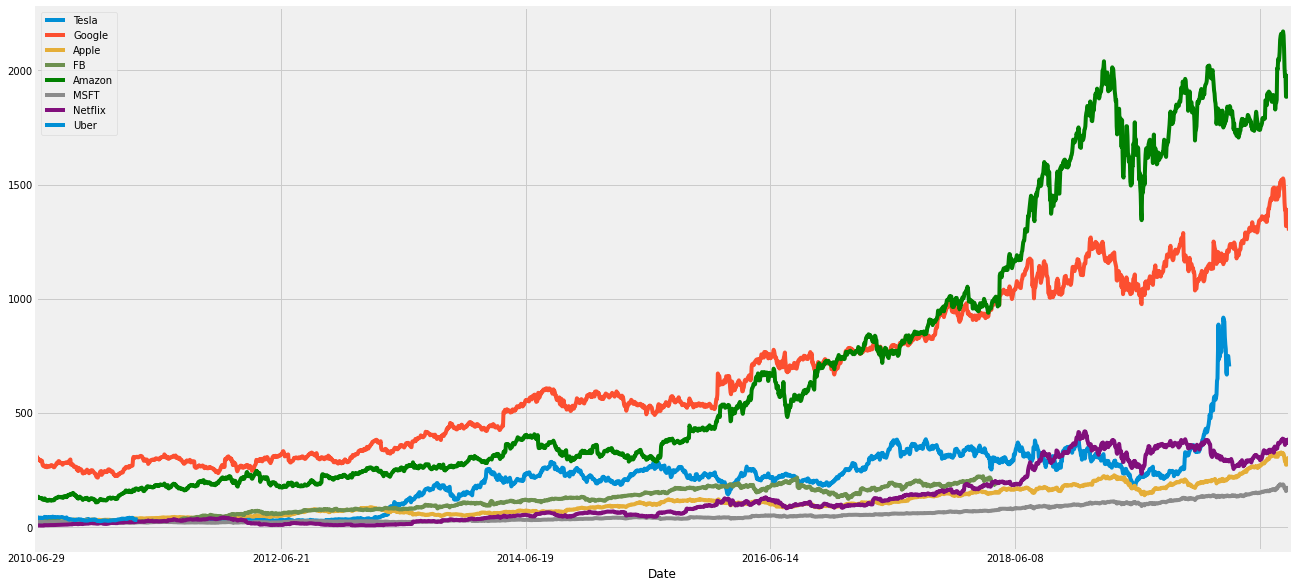

In [32]:
plt.fig = plt.figure(figsize=(20,10))
df_TSLA['Adj Close'].plot(label='Tesla')
df_Google['Adj Close'].plot(label='Google')
df_Apple['Adj Close'].plot(label='Apple')
df_fb['Adj Close'].plot(label='FB')
df_Amazon['Adj Close'].plot(label='Amazon', c='g')
df_Microsoft['Adj Close'].plot(label='MSFT')
df_Netflix['Adj Close'].plot(label='Netflix')
df_Uber['Adj Close'].plot(label='Uber')
plt.legend()
plt.show()

### 2-2. Correlation Matrix of all Car competitors

Measuring the correlation between each stock

In [24]:
corr_tech = df_Tech_merged.corr()

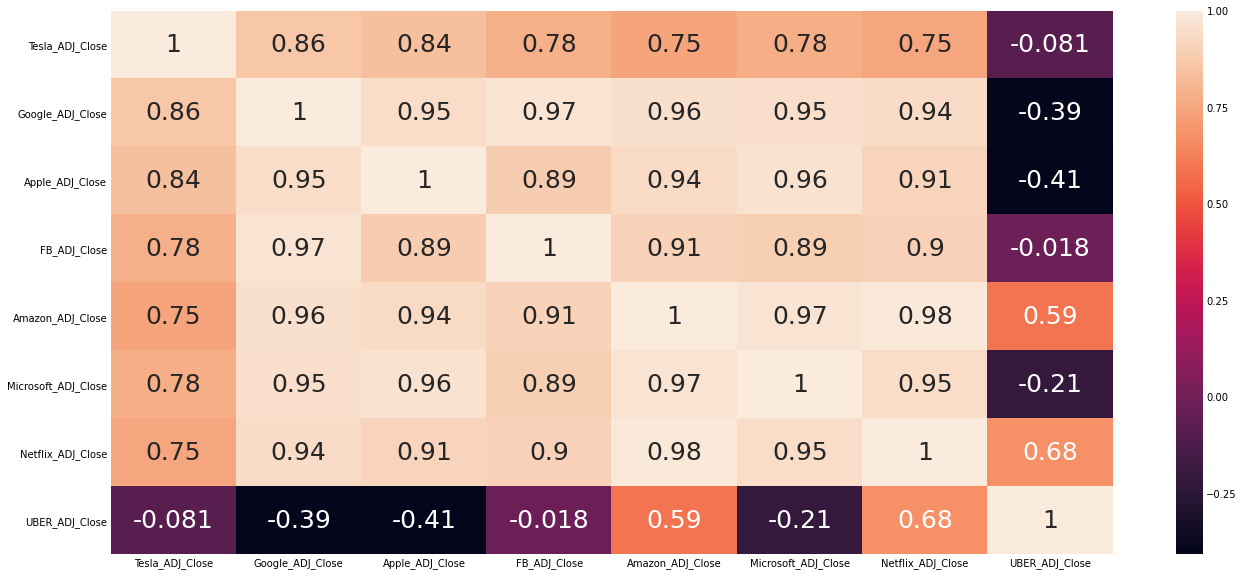

In [25]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_tech, annot=True, annot_kws={"size": 25})

In [ ]:
Extremely high correlation with all tech companies

C:\Users\langl\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\langl\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


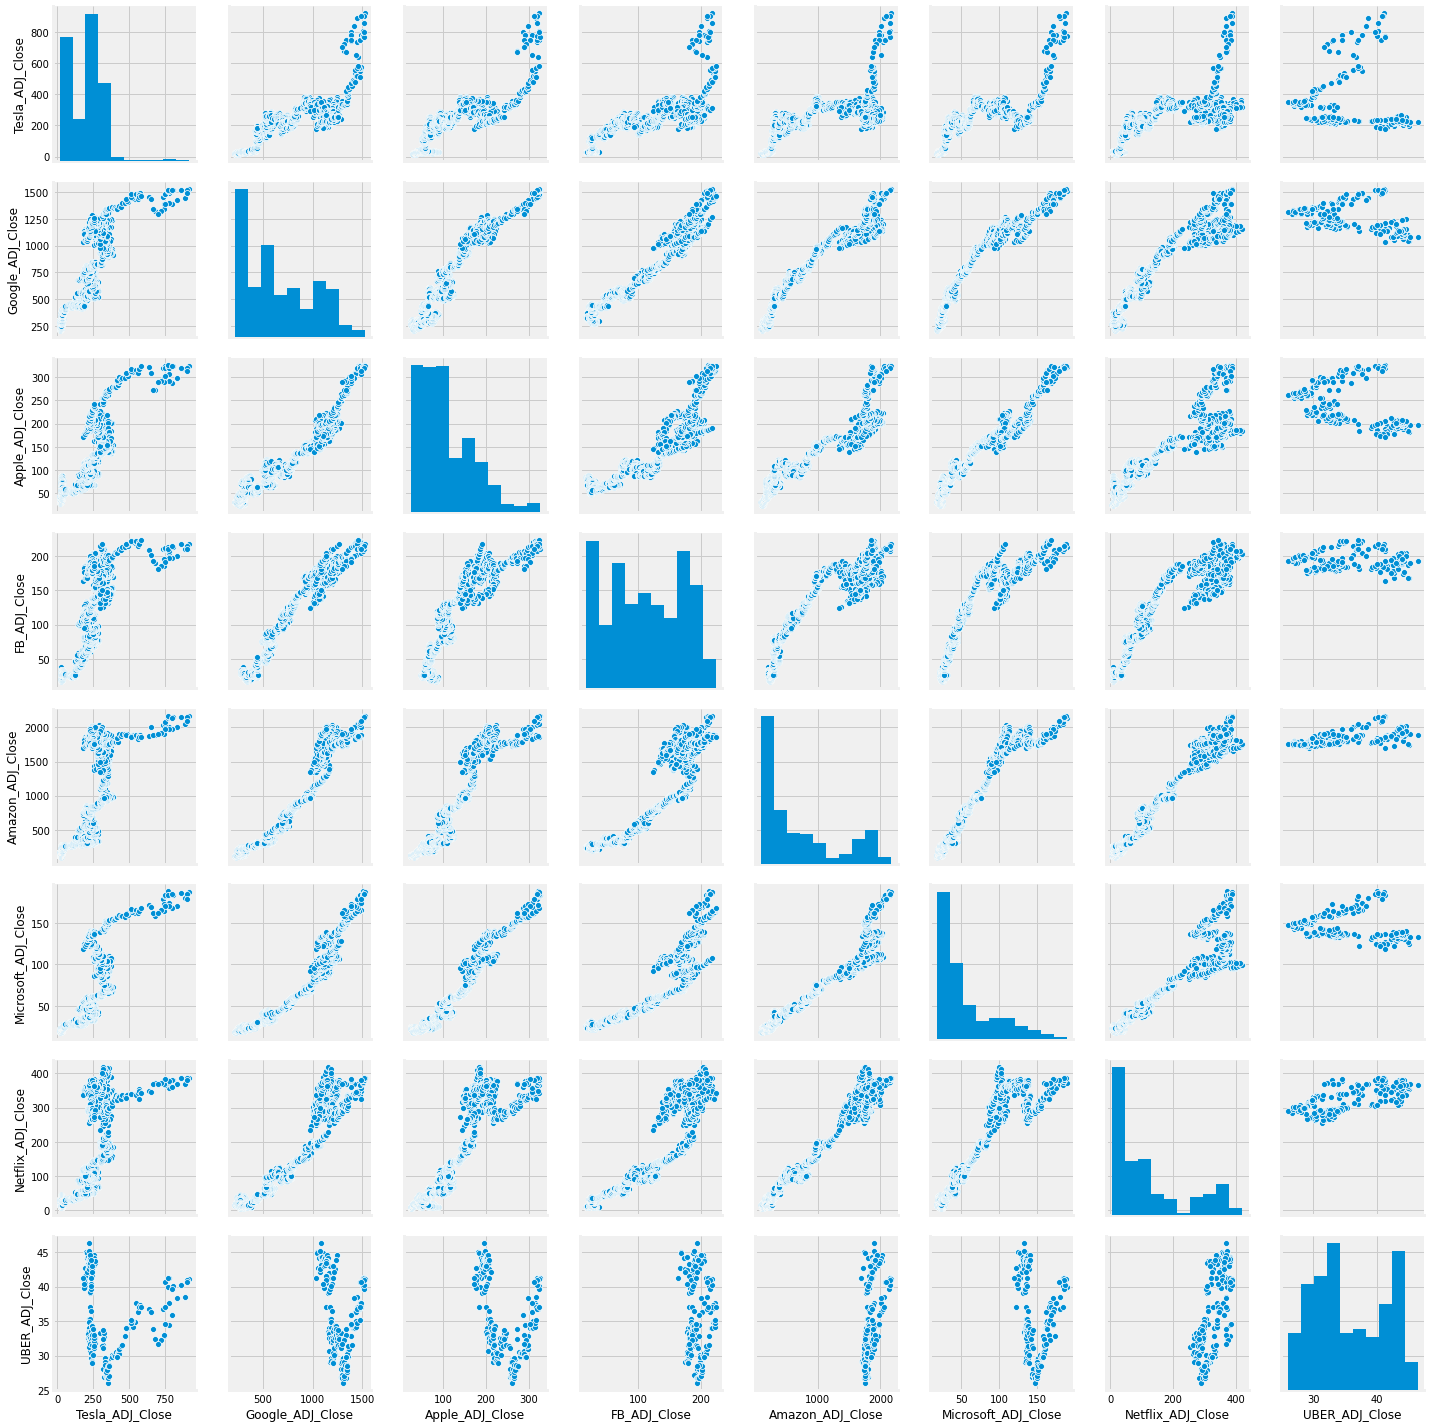

In [28]:
sns.pairplot(df_Tech_merged)

# General Conclusions

Tesla stocks are greatly influenced by US Tech companies with extremely high correlation rate (all above 75%) which indicates a general growth trend followed by